In [1]:
# Import modules
import os
import datetime
from IPython.display import display
import math
import re


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import scipy
import scipy.stats

from utilities import *
import hedge_functions

In [2]:
# Setup utilities and and data path
datadir = os.path.join('..', 'data')

In [3]:
## Select data to analyze
files = ['isx2008C.xls', 'isx2010C.xls']
filename = os.path.join(datadir, files[1])

# Read all sheets into a dictonary with sheet names as keys
data = pd.read_excel(filename, sheet_name=None)

In [4]:
sheet_names = list(data.keys())
sheet_name = 'isx15012010C'

sheet, (mat, T, S, Cobs, E, r) = get_sheet(data, sheet_name)
n,m = Cobs.shape

sheet

,mat,0.34,0.345,0.35,0.355,0.36,0.365,0.37,0.375,0.38,...,0.545,0.55,0.555,0.56,0.565,0.57,s_price,r,date,time
mat,,,,,,,,,,,,,,,,,,,,,
86,86,0.15220,NaN,NaN,NaN,0.13260,NaN,NaN,NaN,0.11320,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49134,0.0011,2009-09-21,0.341270
85,85,0.15505,NaN,NaN,NaN,0.13535,NaN,NaN,NaN,0.11590,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49435,0.0011,2009-09-22,0.337302
84,84,0.15240,NaN,NaN,NaN,0.13270,NaN,NaN,NaN,0.11330,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49036,0.0011,2009-09-23,0.333333
83,83,0.14700,NaN,NaN,NaN,0.12725,NaN,NaN,NaN,0.10805,...,NaN,NaN,NaN,NaN,NaN,NaN,0.48699,0.0011,2009-09-24,0.329365
82,82,0.14555,NaN,NaN,NaN,0.12595,NaN,NaN,NaN,0.10675,...,NaN,NaN,NaN,1.525000,NaN,NaN,0.48411,0.0011,2009-09-25,0.325397
81,81,0.15280,NaN,NaN,NaN,0.13290,NaN,NaN,NaN,0.11350,...,NaN,NaN,NaN,0.001830,NaN,NaN,0.49169,0.0011,2009-09-28,0.321429
80,80,0.15045,NaN,NaN,NaN,0.13075,NaN,NaN,NaN,0.11125,...,NaN,NaN,NaN,0.001550,NaN,NaN,0.49025,0.0011,2009-09-29,0.317460
79,79,0.14965,NaN,NaN,NaN,0.12995,NaN,NaN,NaN,0.11060,...,NaN,NaN,NaN,0.001480,NaN,NaN,0.48835,0.0011,2009-09-30,0.313492
78,78,0.13870,NaN,NaN,NaN,0.11925,NaN,NaN,NaN,0.10025,...,NaN,NaN,NaN,0.001000,NaN,NaN,0.47671,0.0011,2009-01-10,0.309524


In [58]:
%matplotlib inline 

def get_closest_strike(estimate, strikes):
        """
        Return the strike price closest to given estimate
        """
        return strikes[(np.abs(strikes - estimate)).argmin()]
    
def hedge(ymat, strike, premium, r):
    """
    Dummy funciton
    """
    return strike - premium

def simulate(sheet, strikes, step=1, maturity=45, diff=0, sigma=0.1):
    """
    Simulate hedging for estimated costs accuracy of hedging
    
    Params:
        sheet (pd.DataFrame): worksheet to hedge
        strikes (pd.Series):  strike prices for convinience
        step (int):           number of days between hedges
        maturity (int):       number of days to maturity when starting hedging
        diff (int):           difference between spot and strike prices
                              = 0 for ATM-option
                              < 0 for in-the-money option
                              > 0 for out-of-the-money option
    Returns:
        errors (pd.Series)
        MSE (float)
        costs (float)
    """
    
    rows = sheet[sheet.index <= maturity] # start from selected maturity
    rows = rows.iloc[::step, :] # select days to rehedge
    
    # select spot price on t0
    spot_t0 = rows.s_price.iloc[0] 
    
    # select option with ATM strike on t0
    strike = get_closest_strike(spot_t0 - diff, strikes) 
    
    def call_hedge(row):
        """
        Helper function to apply on all rows
        """
        ymat = row.time
        r = row.r
        spot = row.s_price        
        premium = row[row.index.get_loc(strike)]
        
        sigma = hedge_functions.calculate_implied_volatility_bs(
            ymat, strike, spot, r, premium)
        return hedge_functions.delta_hedge(ymat, strike, spot, r, sigma)

    nstocks = rows.apply(call_hedge, axis=1)
       
    
    v_option = rows[strike]
    dv_option = (v_option.shift(-1) - v_option)/v_option
    
    v_portfolio = v_option + nstocks/100 * rows.s_price
    dv_portfolio = (v_portfolio.shift(-1) - v_portfolio)/v_portfolio 
    
    A = dv_portfolio - dv_option
    
    #dv_option = rows.

    unit_cost = 0.15
    costs = (nstocks * unit_cost).sum()
    
    MSE = np.sqrt((A.pow(2)).sum())
    
    
    df = pd.DataFrame({
        'A': A
    })
    
    return A, MSE, costs, nstocks, v_option, v_portfolio, rows

A, MSE, costs, nstocks, v_option, v_portfolio, rows = simulate(sheet, E, step=5, diff=0)



Text(0.5,0.92,'A')

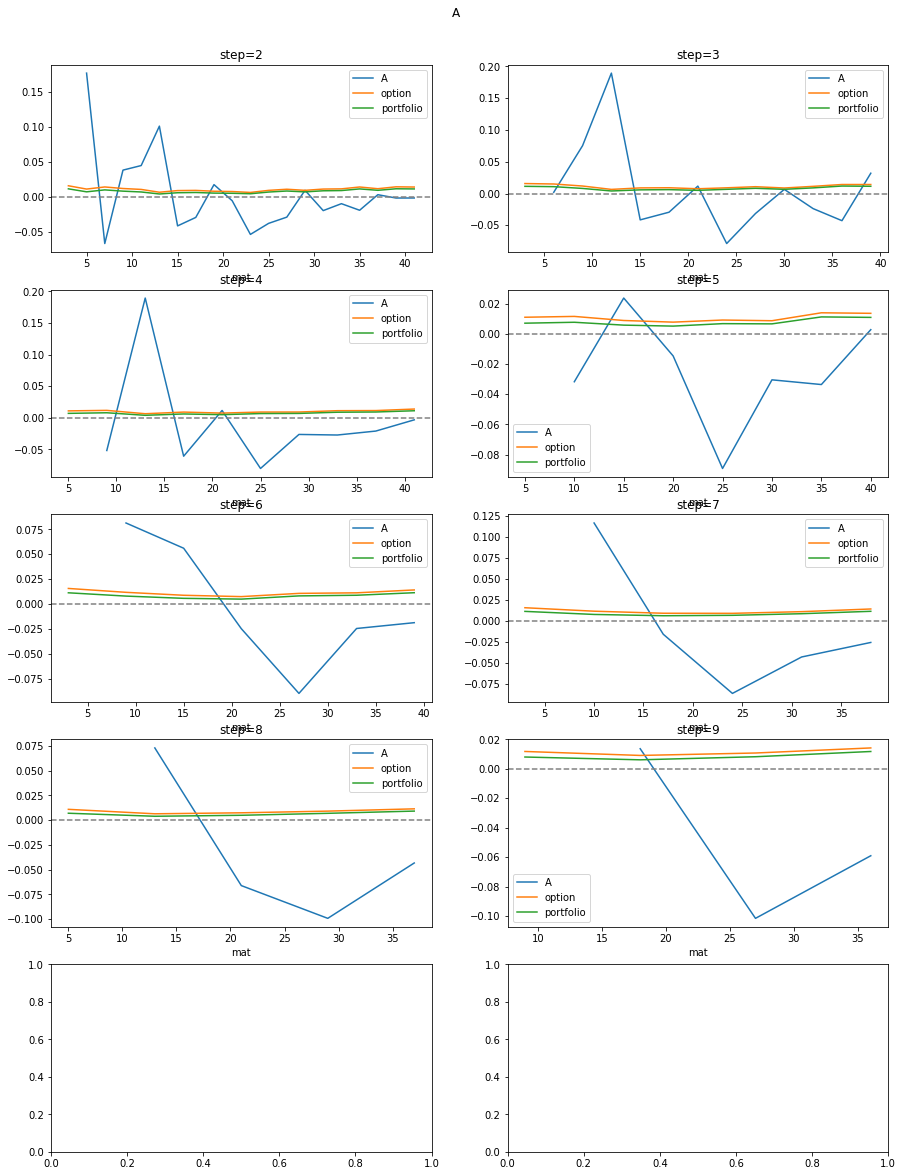

In [59]:
fig, axes = plt.subplots(5, 2, figsize=(15,20))

for (i, ax) in zip(range(2,10,1), axes.flat):
    A, MSE, costs, nstocks, v_option, v_portfolio, rows = simulate(sheet, E, step=i, diff=0)
    A.plot(ax=ax, label='A')
    v_option.plot(ax=ax, label='option')
    v_portfolio.plot(ax=ax, label='portfolio')
    
    ax.axhline(y=0, linestyle='dashed', color='grey')
    ax.legend()
    
    ax.set_title('step={}'.format(i))

fig.suptitle('A', y=0.92)

In [48]:
rows = sheet[sheet.index <= 45] # start from selected maturity
rows = rows.iloc[::1, :] # select days to rehedge

# select spot price on t0
spot_t0 = rows.s_price.iloc[0] 

# select option with ATM strike on t0
strike = get_closest_strike(spot_t0, E)

c_value = rows[strike]
A, MSE, costs, nstocks, v_option, v_portfolio, rows = simulate(sheet, E, step=1, diff=0)

rows[strike]
rows.s_price

mat
45    0.51609
44    0.51654
43    0.51035
42    0.50879
41    0.51600
40    0.51580
39    0.51714
38    0.51714
37    0.50898
36    0.51074
35    0.51638
34    0.51563
33    0.51198
32    0.51389
31    0.51245
30    0.50703
29    0.50933
28    0.51188
27    0.51366
26    0.51535
25    0.51213
24    0.51197
23    0.50571
22    0.50873
21    0.51394
20    0.51515
19    0.51544
18    0.51816
17    0.51816
16    0.51913
15    0.51875
14    0.51890
13    0.51409
12    0.51409
11    0.52273
10    0.52460
9     0.52431
8     0.52634
7     0.52776
6     0.52861
5     0.52429
4     0.52793
3     0.52959
2     0.52411
1         NaN
Name: s_price, dtype: float64

In [46]:
sheet

,mat,0.34,0.345,0.35,0.355,0.36,0.365,0.37,0.375,0.38,...,0.545,0.55,0.555,0.56,0.565,0.57,s_price,r,date,time
mat,,,,,,,,,,,,,,,,,,,,,
86,86,0.15220,NaN,NaN,NaN,0.13260,NaN,NaN,NaN,0.11320,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49134,0.0011,2009-09-21,0.341270
85,85,0.15505,NaN,NaN,NaN,0.13535,NaN,NaN,NaN,0.11590,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49435,0.0011,2009-09-22,0.337302
84,84,0.15240,NaN,NaN,NaN,0.13270,NaN,NaN,NaN,0.11330,...,NaN,NaN,NaN,NaN,NaN,NaN,0.49036,0.0011,2009-09-23,0.333333
83,83,0.14700,NaN,NaN,NaN,0.12725,NaN,NaN,NaN,0.10805,...,NaN,NaN,NaN,NaN,NaN,NaN,0.48699,0.0011,2009-09-24,0.329365
82,82,0.14555,NaN,NaN,NaN,0.12595,NaN,NaN,NaN,0.10675,...,NaN,NaN,NaN,1.525000,NaN,NaN,0.48411,0.0011,2009-09-25,0.325397
81,81,0.15280,NaN,NaN,NaN,0.13290,NaN,NaN,NaN,0.11350,...,NaN,NaN,NaN,0.001830,NaN,NaN,0.49169,0.0011,2009-09-28,0.321429
80,80,0.15045,NaN,NaN,NaN,0.13075,NaN,NaN,NaN,0.11125,...,NaN,NaN,NaN,0.001550,NaN,NaN,0.49025,0.0011,2009-09-29,0.317460
79,79,0.14965,NaN,NaN,NaN,0.12995,NaN,NaN,NaN,0.11060,...,NaN,NaN,NaN,0.001480,NaN,NaN,0.48835,0.0011,2009-09-30,0.313492
78,78,0.13870,NaN,NaN,NaN,0.11925,NaN,NaN,NaN,0.10025,...,NaN,NaN,NaN,0.001000,NaN,NaN,0.47671,0.0011,2009-01-10,0.309524
